# Goal

- Explore categories of data
- Select basic features


In [58]:
import pandas as pd
import numpy as np
import toolbox # my own little package I made to help with curation work

import seaborn as sns
import matplotlib.pyplot as plt
from datetime import datetime

In [61]:
today = datetime.now().strftime("%d%b%Y")

In [48]:
csv_path = "../data/cleaned-data-20231214.csv"
df = pd.read_csv(csv_path, low_memory=False)

df = df.loc[
    :,
    [
        "ID",
        "TYPE",
        "TABLE",
        "NAME",
        "FILEFORMAT",
        "STUDY",
        "ASSAY",
        "DATATYPE",
        "DATASUBTYPE",
        "RESOURCETYPE",
    ],
]

# Explode list columns into rows
df["ASSAY"] = df["ASSAY"].str.split(",")
df = df.explode("ASSAY")

og_shape = df.shape
print("Original dataset info")
df.info()

# focusing on file annotations first
df = df[df["TYPE"] != "folder"]


# drop any missing values to develop training/test sets
df_full = df.dropna(how="any").copy(deep=True)
new_shape = df_full.shape

print("-" * 50)
print("New dataset info")
df_full.info()

print("-" * 50)
print(
    f"Rows removed: {(np.array(og_shape) - np.array(new_shape))[0]} \
        \nPercentage of original dataframe {round(((np.array(og_shape) - np.array(new_shape))[0]/np.array(og_shape))[0] * 100,2)}%"
)

Original dataset info
<class 'pandas.core.frame.DataFrame'>
Int64Index: 524403 entries, 0 to 524391
Data columns (total 10 columns):
 #   Column        Non-Null Count   Dtype 
---  ------        --------------   ----- 
 0   ID            519351 non-null  object
 1   TYPE          519014 non-null  object
 2   TABLE         524403 non-null  object
 3   NAME          519351 non-null  object
 4   FILEFORMAT    488341 non-null  object
 5   STUDY         286254 non-null  object
 6   ASSAY         335338 non-null  object
 7   DATATYPE      334329 non-null  object
 8   DATASUBTYPE   224917 non-null  object
 9   RESOURCETYPE  268392 non-null  object
dtypes: object(10)
memory usage: 44.0+ MB
--------------------------------------------------
New dataset info
<class 'pandas.core.frame.DataFrame'>
Int64Index: 148805 entries, 0 to 524390
Data columns (total 10 columns):
 #   Column        Non-Null Count   Dtype 
---  ------        --------------   ----- 
 0   ID            148805 non-null  object
 

In [50]:
df_full.head(10)

,ID,TYPE,TABLE,NAME,FILEFORMAT,STUDY,ASSAY,DATATYPE,DATASUBTYPE,RESOURCETYPE
0,syn2426151,file,SAGE.PORTAL_RAW.AD,chr1.chop.dosage.gz,GZ,ROSMAP,SNParray,genomicVariants,processed,analysis
1,syn2426152,file,SAGE.PORTAL_RAW.AD,chr2.chop.dosage.gz,GZ,ROSMAP,SNParray,genomicVariants,processed,analysis
2,syn2426153,file,SAGE.PORTAL_RAW.AD,chr4.chop.dosage.gz,GZ,ROSMAP,SNParray,genomicVariants,processed,analysis
3,syn2426154,file,SAGE.PORTAL_RAW.AD,chr8.chop.dosage.gz,GZ,ROSMAP,SNParray,genomicVariants,processed,analysis
4,syn2426155,file,SAGE.PORTAL_RAW.AD,chr9.chop.dosage.gz,GZ,ROSMAP,SNParray,genomicVariants,processed,analysis
5,syn2426156,file,SAGE.PORTAL_RAW.AD,chr6.chop.dosage.gz,GZ,ROSMAP,SNParray,genomicVariants,processed,analysis
6,syn2426157,file,SAGE.PORTAL_RAW.AD,chr5.chop.dosage.gz,GZ,ROSMAP,SNParray,genomicVariants,processed,analysis
7,syn2426182,file,SAGE.PORTAL_RAW.AD,chr3.chop.dosage.gz,GZ,ROSMAP,SNParray,genomicVariants,processed,analysis
8,syn2426183,file,SAGE.PORTAL_RAW.AD,chr7.chop.dosage.gz,GZ,ROSMAP,SNParray,genomicVariants,processed,analysis
9,syn2426394,file,SAGE.PORTAL_RAW.AD,chr14.chop.dosage.gz,GZ,ROSMAP,SNParray,genomicVariants,processed,analysis


In [51]:
list(df_full['ASSAY'].unique())

['SNParray',
 'methylation array',
 'miRNA array',
 'RNA-seq assay',
 'RNA array',
 'ChIP-seq assay',
 'immunofluorescence',
 'labelfreemass spectrometry assay',
 'FIA-MSMS',
 'memorybehavior',
 'ELISA',
 'LC-MS',
 'BiocratesBileAcids',
 'Biocratesp180',
 'LC-SRM',
 'whole genome sequencing assay',
 'MRI',
 'positron emission tomography imaging assay',
 'questionnaire',
 'UPLC-MSMS',
 'single-cell RNA sequencing assay',
 'TMT quantitation assay',
 'LC-MSMS',
 'autoradiography',
 'electrochemiluminescence',
 'blood chemistry measurement',
 'mRNAcounts',
 'BakerLipidomics',
 'frailtyassessment',
 'openfieldtest',
 'rotarodperformancetest',
 'spontaneousalternation',
 'wheelrunning',
 'ATAC-seq assay',
 'western blot assay',
 'whole exome sequencing assay',
 'single-cell whole genome sequencing assay',
 'CITESeq',
 'proximity extension assay',
 'SiMoA',
 'NightingaleNMR',
 'Hi-C assay',
 'UPLC-ESI-QTOF-MS',
 '16SrRNA-seq assay',
 'bisulfite sequencing assay',
 'Metabolon',
 'LTP',
 'MDMS-

In [53]:
# Top 20 assays
assays = list(df_full["ASSAY"].value_counts()[:20].reset_index()["index"])
assays

['RNA-seq assay',
 'whole genome sequencing assay',
 'methylation array',
 'single-nucleus RNA sequencing assay',
 'TMT quantitation assay',
 'single-cell RNA sequencing assay',
 'ChIP-seq assay',
 'ATAC-seq assay',
 'single-cell whole genome sequencing assay',
 'single-nucleus ATAC-seq assay',
 '16SrRNA-seq assay',
 '10xmultiome',
 'labelfreemass spectrometry assay',
 'immunofluorescence',
 'bisulfite sequencing assay',
 'miRNA-seq assay',
 'whole exome sequencing assay',
 'Hi-C assay',
 'SNParray',
 'LC-MSMS']

In [55]:
df_full["STUDY"].value_counts()[:20]

ROSMAP                              33315
AMP-AD_DiverseCohorts               19470
MIT_ROSMAP_Multiomics               13578
rnaSeqReprocessing                  12318
SV_xQTL                             10569
LBP                                  7840
SEA-AD                               6378
MSBB                                 6321
VirusResilience_Mayo.MSBB.ROSMAP     5669
MayoRNAseq                           3621
BrainGVEX                            2232
SMIB-AD                              2154
RR_APOE4                             2058
UCSF_MAC                             1971
StJude_BannerSun                     1828
Jax.IU.Pitt_MicrobiomePilot          1152
ROSMAP_CognitiveResilience           1128
UCI_5XFAD                            1100
BrainTF                              1018
Jax.IU.Pitt_APOE4.Trem2.R47H          916
Name: STUDY, dtype: int64

| STUDY                 |   count |   proportion |
|:----------------------|--------:|-------------:|
| ROSMAP                |   33315 |       22.388 |
| AMP-AD_DiverseCohorts |   19470 |       13.084 |
| MIT_ROSMAP_Multiomics |   13578 |        9.125 |
| rnaSeqReprocessing    |   12318 |        8.278 |
| SV_xQTL               |   10569 |        7.103 |
| LBP                   |    7840 |        5.269 |


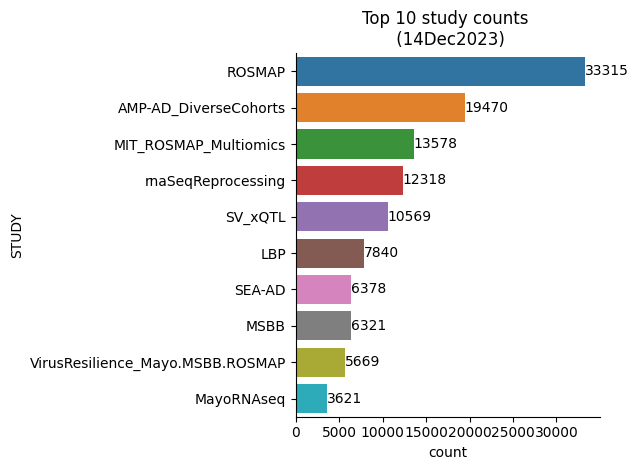

In [66]:
# study
study_temp = df_full.groupby(
    ['STUDY'])['NAME'].count().reset_index().rename(columns={'NAME': 'count'})
study_temp['proportion'] = round(study_temp['count'] / study_temp['count'].sum()*100,3)

print(study_temp[study_temp['proportion'] > 5].sort_values(by='proportion', ascending = False).to_markdown(index = False))

ax = sns.barplot(
    data = study_temp.sort_values(by='count', ascending=False)[:10], 
    x = 'count',
    y =  'STUDY',
    hue = 'STUDY'
)

ax.set(title=f'Top 10 study counts \n ({today})')

for container in ax.containers:
    ax.bar_label(container)

sns.despine()

plt.tight_layout()
# save the plot as JPG file
plt.savefig("../imgs/study-counts-{today}.jpg")

In [68]:
fileformats = list(df_full["FILEFORMAT"].value_counts()[
                   :20].reset_index()['index'])

In [83]:
# Explore proportions in dataset
temp = (
    df_full.groupby(["ASSAY", "FILEFORMAT"])["NAME"]
    .count()
    .reset_index()
    .rename(columns={"NAME": "count"})
)
temp["countLog"] = np.log10(temp["count"])

temp2 = (
    df_full.groupby(["FILEFORMAT"])["NAME"]
    .count()
    .reset_index()
    .rename(columns={"NAME": "count"})
)

temp2["proportion"] = temp2["count"] / temp2["count"].sum() * 100

print(
    temp2[temp2["proportion"] > 5]
    .sort_values(by="proportion", ascending=False)
    .to_markdown(index=False)
)

| FILEFORMAT   |   count |   proportion |
|:-------------|--------:|-------------:|
| GZ           |   76249 |     51.2409  |
| BAM          |   15651 |     10.5178  |
| JPG          |   12171 |      8.17916 |



| ASSAY                               |   count |   proportion |
|:------------------------------------|--------:|-------------:|
| RNA-seq assay                       |   59628 |       40.071 |
| whole genome sequencing assay       |   28742 |       19.315 |
| methylation array                   |   22871 |       15.37  |
| single-nucleus RNA sequencing assay |    9835 |        6.609 |
| TMT quantitation assay              |    8444 |        5.675 |


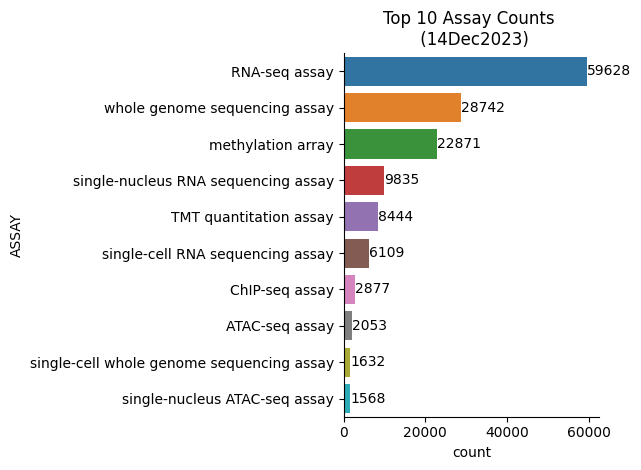

In [86]:
temp3 = (
    df_full.groupby(["ASSAY"])["NAME"]
    .count()
    .reset_index()
    .rename(columns={"NAME": "count"})
)
temp3["proportion"] = round(temp3["count"] / temp3["count"].sum() * 100, 3)

print(
    temp3[temp3["proportion"] > 5]
    .sort_values(by="proportion", ascending=False)
    .to_markdown(index=False)
)

ax = sns.barplot(
    data=temp3.sort_values(by="count", ascending=False)[:10],
    x="count",
    y="ASSAY",
    hue="ASSAY",
)

for container in ax.containers:
    ax.bar_label(container)

ax.set(title=f"Top 10 Assay Counts \n ({today})")

sns.despine()

plt.tight_layout()
# save the plot as JPG file
plt.savefig(f"../imgs/assay-counts-{today}.jpg")

In [89]:
from dash import Dash, dcc, html, Input, Output
import plotly.express as px

app = Dash(__name__)


app.layout = html.Div([
    html.H4('file formats'),
    dcc.Dropdown(
        id="dropdown",
        options=list(temp['ASSAY'].unique()),
        value="immunofluorescence",
        clearable=False,
    ),
    dcc.Graph(id="graph"),
])


@app.callback(
    Output("graph", "figure"),
    Input("dropdown", "value"))
    
def update_bar_chart(assay):
    # temp = px.data.tips()  # replace with your own data source
    mask = temp["ASSAY"] == assay
    fig = px.bar(temp[mask], x="countLog", y="FILEFORMAT",
                 color="ASSAY", barmode="group")
    return fig


app.run_server(debug=True)

| DATATYPE        |   count |   proportion |
|:----------------|--------:|-------------:|
| geneExpression  |   76415 |       51.352 |
| genomicVariants |   30747 |       20.663 |
| epigenetics     |   29173 |       19.605 |
| proteomics      |    9274 |        6.232 |


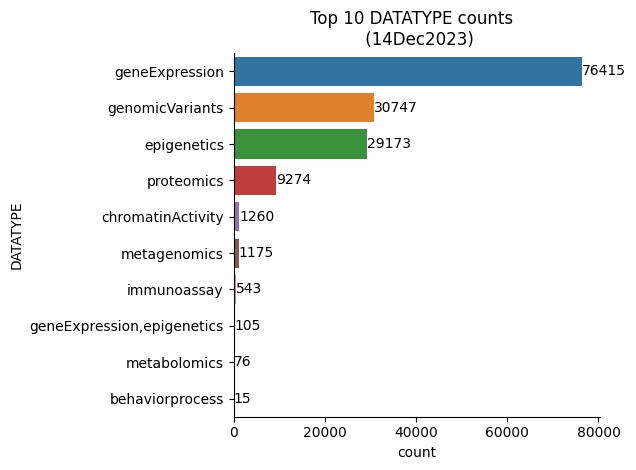

In [92]:
# DATATYPE
temp4 = (
    df_full.groupby(["DATATYPE"])["NAME"]
    .count()
    .reset_index()
    .rename(columns={"NAME": "count"})
)
temp4["proportion"] = round(temp4["count"] / temp4["count"].sum() * 100, 3)

print(
    temp4[temp4["proportion"] > 5]
    .sort_values(by="proportion", ascending=False)
    .to_markdown(index=False)
)

ax = sns.barplot(
    data=temp4.sort_values(by="count", ascending=False)[:10],
    x="count",
    y="DATATYPE",
    hue="DATATYPE",
)

ax.set(title=f"Top 10 DATATYPE counts  \n ({today})")

for container in ax.containers:
    ax.bar_label(container)

sns.despine()

plt.tight_layout()

# save the plot as JPG file
plt.savefig(f"../imgs/DATATYPE-counts-{today}.jpg")

| DATASUBTYPE   |   count |   proportion |
|:--------------|--------:|-------------:|
| raw           |  107619 |       72.322 |
| processed     |   33071 |       22.224 |


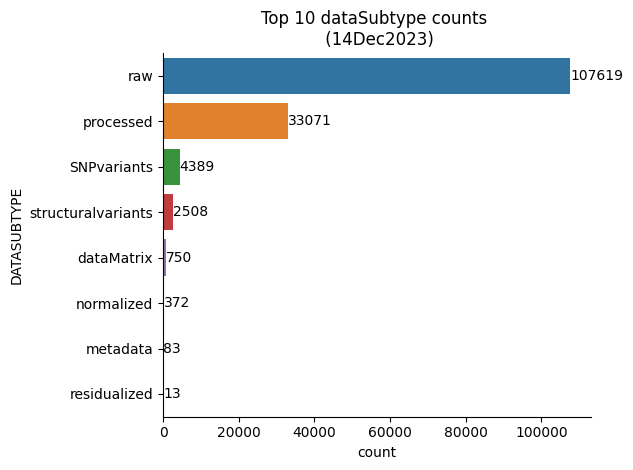

In [96]:
# dataSubtype
temp5 = (
    df_full.groupby(["DATASUBTYPE"])["NAME"]
    .count()
    .reset_index()
    .rename(columns={"NAME": "count"})
)
temp5["proportion"] = round(temp5["count"] / temp5["count"].sum() * 100, 3)

print(
    temp5[temp5["proportion"] > 5]
    .sort_values(by="proportion", ascending=False)
    .to_markdown(index=False)
)

ax = sns.barplot(
    data=temp5.sort_values(by="count", ascending=False)[:10],
    x="count",
    y="DATASUBTYPE",
    hue="DATASUBTYPE",
)

ax.set(title=f"Top 10 dataSubtype counts \n ({today})")

for container in ax.containers:
    ax.bar_label(container)

sns.despine()

plt.tight_layout()

# save the plot as JPG file
plt.savefig(f"../imgs/dataSubtype-counts-{today}.jpg")

| RESOURCETYPE     |   count |   proportion |
|:-----------------|--------:|-------------:|
| experimentalData |  134145 |       90.148 |
| analysis         |   14576 |        9.795 |


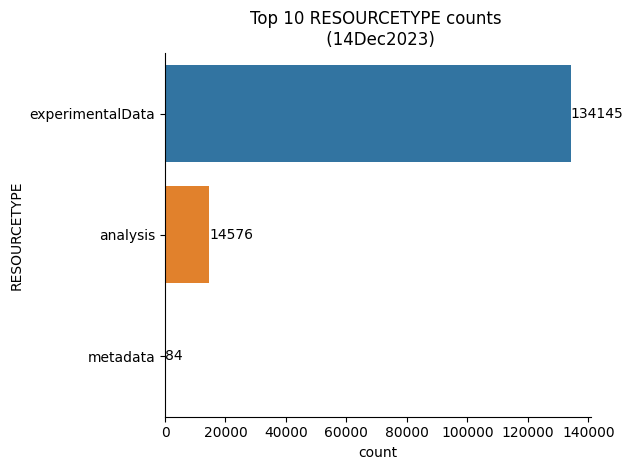

In [97]:
# RESOURCETYPE
temp6 = (
    df_full.groupby(["RESOURCETYPE"])["NAME"]
    .count()
    .reset_index()
    .rename(columns={"NAME": "count"})
)
temp6["proportion"] = round(temp6["count"] / temp6["count"].sum() * 100, 3)

print(
    temp6[temp6["proportion"] > 5]
    .sort_values(by="proportion", ascending=False)
    .to_markdown(index=False)
)

ax = sns.barplot(
    data=temp6.sort_values(by="count", ascending=False)[:10],
    x="count",
    y="RESOURCETYPE",
    hue="RESOURCETYPE",
)

ax.set(title=f"Top 10 RESOURCETYPE counts \n ({today})")

for container in ax.containers:
    ax.bar_label(container)

sns.despine()

plt.tight_layout()
# save the plot as JPG file
plt.savefig(f"../imgs/RESOURCETYPE-counts-{today}.jpg")